In [234]:
#Analysis

#Of the 4 drug treatments singles out, only Capomulin showed a decrease in tumor size throughout the 45 day study. The spread in metastastic sites appeared to be less frequent in mice who were given Capomulin.

#Out of the 4 drugs, Ketapril appeared to have the most negative effect on tumor volume. For some mice given this drug, tumor size actually increased.

#Slightly more mice died on the Infubinol regimen as compared to the other drugs.The results of this study leads to the conclusion that tumor size or the metastastic site count did seem to be a contributing cause of death. 



# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"





In [235]:
#Open and read trial data into dataframe
csv_path = 'data/clinicaltrial_data.csv'

clinical_df = pd.read_csv(csv_path)
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [236]:
#Open and read mouse data into dataframe 
csv_path = 'data/mouse_drug_data.csv'

mouse_df = pd.read_csv(csv_path)
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [237]:
#Combine data into single dataset

trial_data = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="inner")

trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [238]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor = trial_data.pivot_table(values='Tumor Volume (mm3)', index=['Drug', 'Timepoint'])
#Calculate mean of Tumor Volume
mean_tumor = pd.DataFrame(mean_tumor.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
#Calculate Standard error of Tumor Volume
mean_tumor['Volume SEM'] = mean_tumor['Tumor Volume (mm3)'].sem()
mean_tumor.reset_index(inplace=True)

# Preview data
mean_tumor.head()

,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [239]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_pivot = mean_tumor.pivot_table(index = 'Timepoint',columns = 'Drug',values='Tumor Volume (mm3)')
# Preview Reformatting worked

mean_tumor_pivot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [240]:
#Calculate the mean and standard error for the Tumor Volume
mean_tumor_sem_pivot = mean_tumor.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')
mean_tumor_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


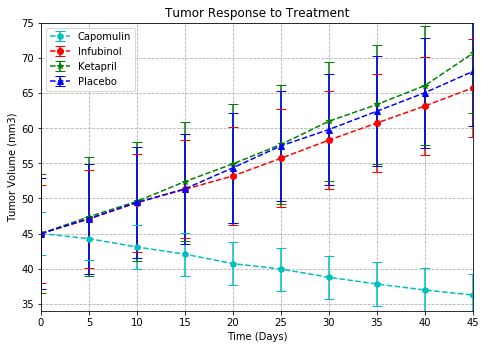

In [241]:
# Generate the Plot (with Error Bars) #For loop
fig = plt.figure()
ax1 =fig.add_axes([0,0,1,1])

#Plot lines for different drugs, ax = plt.subplots()
Capomulin_std = timeline['Capomulin'].std()
Infubinol_std = timeline['Infubinol'].std()
Ketapril_std = timeline['Ketapril'].std()
Placebo_std = timeline['Placebo'].std()

Capomulin = plt.errorbar(timeline.index, timeline['Capomulin'], yerr=Capomulin_std, color='c', fmt='--h', 
    capsize=5, label = 'Capomulin')

Infubinol = plt.errorbar(timeline.index, timeline['Infubinol'], yerr=Infubinol_std, color='r', fmt='--o', 
    capsize=5, label = 'Infubinol')

Ketapril = plt.errorbar(timeline.index, timeline['Ketapril'], yerr=Ketapril_std, color='g', fmt='--*', 
    capsize=5, label = 'Ketapril')

Placebo = plt.errorbar(timeline.index, timeline['Placebo'], yerr=Placebo_std, color='b', fmt='--^', 
    capsize=5, label = 'Placebo')

#Add grid plot limits
ax1.set_xlim(0,45)
ax1.set_ylim(34,75)
ax1.grid(linestyle='--')


#Add labels
ax1.legend (loc="Best")  
ax1.set_title("Tumor Response to Treatment")           
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.grid(linestyle='--')
             



# Save the Figureline
fig.savefig("TumorResponsetoTreatment.png")
plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [242]:
# Store the Mean Met. Site Data 
meta_response_error = trial_data[['Drug','Timepoint','Metastatic Sites']]

#Calcucate the mean of Met. Site Grouped by Drug and Timepoint 
meta_response_error = pd.DataFrame(meta_response_error.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

#Calculate the stand error for Met Site
meta_response_error['Metastatic Site SEM'] = meta_response_error['Metastatic Sites'].sem()
meta_response_error.reset_index(inplace=True)

# Preview DataFrame
meta_response_error.head()

,Drug,Timepoint,Metastatic Sites,Metastatic Site SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [243]:
## Reformat Met. Response DataFrame 
meta_response_error_pivot = meta_response_error.pivot_table(values='Metastatic Sites', index = 'Timepoint', columns='Drug')
#Preview dataframe
meta_response_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [244]:
#Reformat Vol SEM 
meta_response_sem_pivot = meta_response_error.pivot(values='Metastatic Site SEM',index = 'Timepoint',columns='Drug')
meta_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
5,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
10,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
15,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
20,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
25,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
30,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
35,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
40,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044


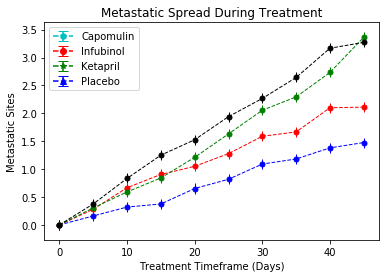

In [245]:
# Generate the Plot (with Error )



plt.errorbar(meta_response_error_pivot.index, meta_response_error_pivot['Capomulin'], yerr=meta_response_sem_pivot['Capomulin'],color='b', marker='o',markersize=5, ls="dashed", linewidth=1)

plt.errorbar(meta_response_error_pivot.index, meta_response_error_pivot['Infubinol'], yerr=meta_response_sem_pivot['Infubinol'],color='r', marker='o', markersize=5, ls="dashed", linewidth=1)

plt.errorbar(meta_response_error_pivot.index, meta_response_error_pivot['Ketapril'], yerr=meta_response_sem_pivot['Ketapril'],color='g', marker='o', markersize=5, ls="dashed", linewidth=1)

plt.errorbar(meta_response_error_pivot.index, meta_response_error_pivot['Placebo'], yerr=meta_response_sem_pivot['Placebo'],color='black', marker='o', markersize=5, ls="dashed", linewidth=1)




#Add labels
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo],loc="upper left")
plt.title("Metastatic Spread During Treatment")           
plt.xlabel("Treatment Timeframe (Days)")
plt.ylabel("Metastatic Sites")
ax1.grid(linestyle='--')
             

# Save the Figureline
fig.savefig("Metastatic Spread During Treatment.png")
plt.show()





![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [246]:
# Store the Data to be used
surv_rates = trial_data[['Drug','Timepoint','Mouse ID']]
# Convert to DataFrame
surv_rates = surv_rates.set_index(['Drug','Timepoint'])

# Preview DataFrame
surv_rates.head()

Mouse ID
Drug      Timepoint         
Capomulin 0             b128
          5             b128
          10            b128
          15            b128
          20            b128

In [247]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
surv_rates['Mouse Count'] = surv_rates.groupby(['Drug','Timepoint']).count()
['Mouse ID']

# Minor Data Munging to Re-Format the Data Frames
surv_rates_pivot = surv_rates.pivot_table(index='Timepoint',columns='Drug', values='Mouse Count')


# Preview the Data Frame
surv_rates_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


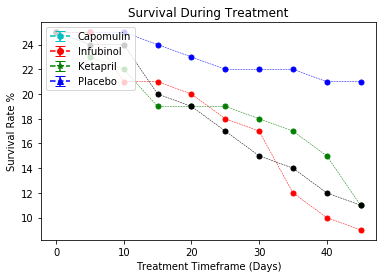

In [248]:
# Generate the Plot (with Error )

plt.errorbar(surv_rates_pivot.index, surv_rates_pivot['Capomulin'],color='b', marker='o',markersize=5, ls="dashed", linewidth=.5)

plt.errorbar(surv_rates_pivot.index, surv_rates_pivot['Infubinol'],color='r', marker='o', markersize=5, ls="dashed", linewidth=.5)

plt.errorbar(surv_rates_pivot.index, surv_rates_pivot['Ketapril'],color='g', marker='o', markersize=5, ls="dashed", linewidth=.5)

plt.errorbar(surv_rates_pivot.index, surv_rates_pivot['Placebo'],color='black', marker='o', markersize=5, ls="dashed", linewidth=.5)




#Add labels
plt.legend(handles=[Capomulin, Infubinol, Ketapril, Placebo],loc="upper left")
plt.title("Survival During Treatment")           
plt.xlabel("Treatment Timeframe (Days)")
plt.ylabel("Survival Rate %")
ax1.grid(linestyle='--')
             

# Save the Figureline
fig.savefig("Survival During Treatment.png")
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [249]:
# Calculate the percent changes for each drug

summary=round(((surv_rates_pivot.iloc[9,:]-surv_rates_pivot.iloc[0,:])*100/surv_rates_pivot.iloc[0,:]),0).to_frame()

# Display the data to confirm
summary=summary.rename(columns={0:"% Tumor Change"})

summary

,% Tumor Change
Drug,
Capomulin,-16.0
Ceftamin,-48.0
Infubinol,-64.0
Ketapril,-56.0
Naftisol,-48.0
Placebo,-56.0
Propriva,-73.0
Ramicane,-20.0
Stelasyn,-58.0


In [250]:
#Setting the x and y axis
x_axis=summmary.index.values
y_axis=summary["% Tumor Change"]


# Splice the data between passing and failing drugs

summary["Positve"]=summary["% Tumor Change"]> 0
# Orient widths. Add labels, tick marks, etc. 
fig,ax=plt.subplots()
bars=ax.bar(x_axis,y_axis,align="edge", width=1, linewidth=1,edgecolor=summary.Positive.map({True:'black', False:'black'}),color=summary.Positive.map({True='green', False:'red}))

# Use functions to label the percentages of changes

tick_locations = [value+0.49 for value in range(len(x_axis))]
print(tick_location)
ax.set_xticks(tick_location)

height = summary.Positive.map({True: 5, False: -5})
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., height[bars.index(bar)], 
           str(int(summary["% Tumor Change"][bars.index(bar)]))+ "%",
           ha='center', va='bottom')
    
ax.set_xlim(0,len(x_axis))

plt.hlines(0,0,len(x_axis))

ax.set_title("Tumor Change over 45 Day Treatment", fontsize=16)

ax.set_ylabel("% Tumor Volume Change")

plt.grid(linestyle='dotted')

plt.show()
# Call functions to implement the function calls


# Save the Figure


# Show the Figure

SyntaxError: invalid syntax (<ipython-input-250-9668610f769c>, line 11)

![Metastatic Spread During Treatment](../Images/change.png)